In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

In [2]:
road = cv2.imread('road.jpg')

In [3]:
def show(image):
    cv2.imshow(str(image), image)
    cv2.waitKey(0)

In [9]:
def sobel(image):
    sobel_image = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=3)
    return sobel_image

In [4]:
show(road)

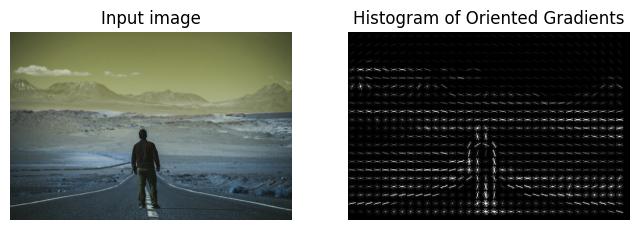

In [5]:
fd, hog_image = hog(road, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(road, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [7]:
people = cv2.imread('people.png')

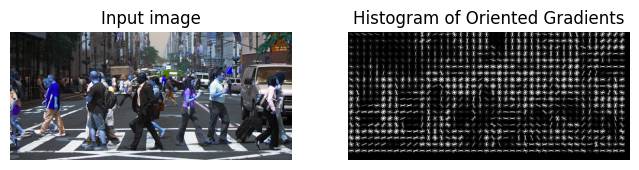

In [8]:
fd, hog_image = hog(people, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(people, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [10]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [11]:
(rects, weights) = hog.detectMultiScale(road, winStride=(4, 4), padding=(8, 8), scale=1.05)

In [12]:
for (x, y, w, h) in rects:
    cv2.rectangle(road, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [13]:
(rects, weights) = hog.detectMultiScale(people, winStride=(4, 4), padding=(8, 8), scale=1.05)

In [14]:
for (x, y, w, h) in rects:
    cv2.rectangle(people, (x, y), (x + w, y + h), (0, 255, 0), 2)

Text(0.5, 1.0, 'Detect people')

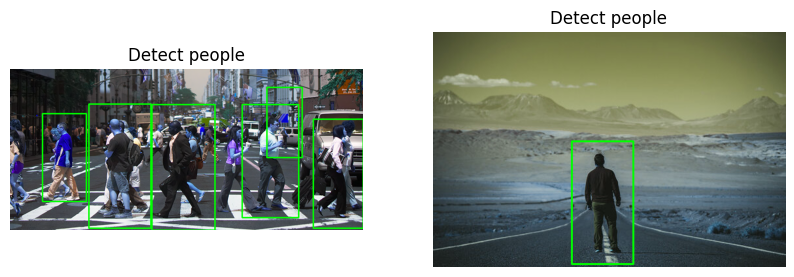

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(people)
axs[0].axis('off')
axs[0].set_title('Detect people')
axs[1].imshow(road)
axs[1].axis('off')
axs[1].set_title('Detect people')